In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

###### you can find the dataset here : https://www.kaggle.com/uciml/pima-indians-diabetes-database?select=diabetes.csv

In [2]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=2)


In [9]:
neighbours=np.arange(1,9)
test_acc=np.empty(len(neighbours))
train_acc=np.empty(len(neighbours))

In [10]:
for i,k in enumerate(neighbours):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_acc[i]=knn.score(X_train,y_train)
    test_acc[i]=knn.score(X_test,y_test)
    

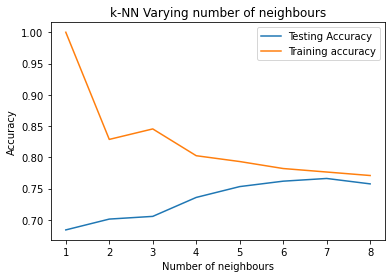

In [11]:
plt.title('k-NN Varying number of neighbours')
plt.plot(neighbours, test_acc, label='Testing Accuracy')
plt.plot(neighbours, train_acc, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show()

In [12]:
Final_model=KNeighborsClassifier(n_neighbors=7)
Final_model.fit(X_train,y_train)
Final_model.score(X_test,y_test)

0.7662337662337663

In [13]:
y_pred=Final_model.predict(X_test)

In [14]:
acc=accuracy_score(y_test,y_pred)
acc

0.7662337662337663

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
grid={'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [17]:
knn_cv.best_score_

0.7578558696205755

In [18]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression(random_state=1,max_iter=1000)
Lr.fit(X_train,y_train)
Lr_pred=Lr.predict(X_test)
Lr_acc=accuracy_score(y_test,Lr_pred)
#Lr_conf_matrix=confusion_matrix(y_test,Lr_pred)
print('accuracy:',Lr_acc)
#print(Lr_conf_matrix)
#print(classification_report(y_test,Lr_pred))


accuracy: 0.7748917748917749
